In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#For the linnear regression models
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import math
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
df= pd.read_csv('/Users/inesmarina/Desktop/machine_learning_proyect3/CAR DETAILS FROM CAR DEKHO.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.head(0)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner


In [6]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
fuel_type=df['fuel'].unique()
print(fuel_type)

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [11]:
transmission_type= df['transmission'].unique()
print(transmission_type)

['Manual' 'Automatic']


In [12]:
ownership=df['owner'].unique()
print(ownership)

['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [14]:
kms=df['km_driven'].unique()
print(kms)

[ 70000  50000 100000  46000 141000 125000  25000  60000  78000  35000
  24000   5000  33000  28000  59000   4500 175900  14500  15000  33800
 130400  80000  10000 119000  75800  40000  74000  64000 120000  79000
  18500  10200  29000  90000  73300  92000  66764 350000 230000  31000
  39000 166000 110000  54000  63000  76000  11958  20000   9000   6500
  58000  62200  34000  53000  49000  63500   9800  13000  21000  29173
  48000  30000  87000  16000  79350  81000   3600  14272  49213  57000
   3240 114000  53772 140000 175000  36000 155500  23000  22155  78380
 150000  80362  55000   1136  43000   2650 115962  65000  56000 213000
 139000 160000 163000  32000  52000  11240  66000  26500  72000  44000
 130000 195000 155000   4000  41000  10832  14681  51000 200000  19600
  46730  21170 167223 141440 212814  88635 149674   8000  68000  38000
  75000  98000  81925  82080  97000  52047  62009  33100 220000  45000
 180000  22000  80577 127500  40903  22288  61690  64484  75976  85962
  5703

In [15]:
df['km_driven'].value_counts()

km_driven
70000     236
80000     228
50000     222
120000    220
60000     215
         ... 
19107       1
32077       1
6480        1
118400      1
112198      1
Name: count, Length: 770, dtype: int64

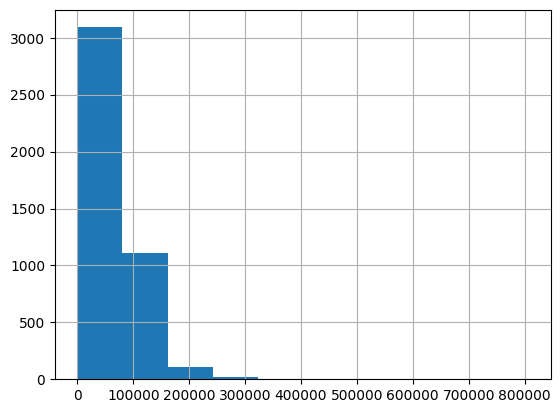

In [16]:
df['km_driven'].hist()
plt.show()

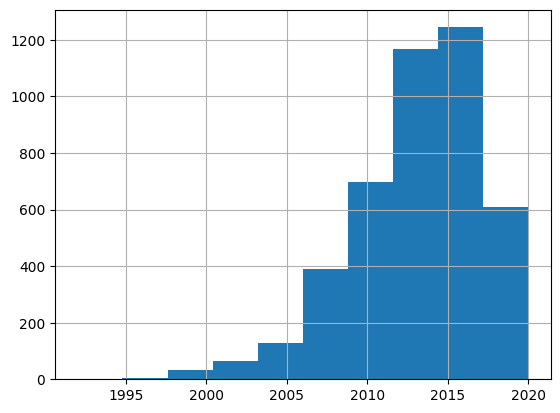

In [17]:
df['year'].hist()
plt.show()

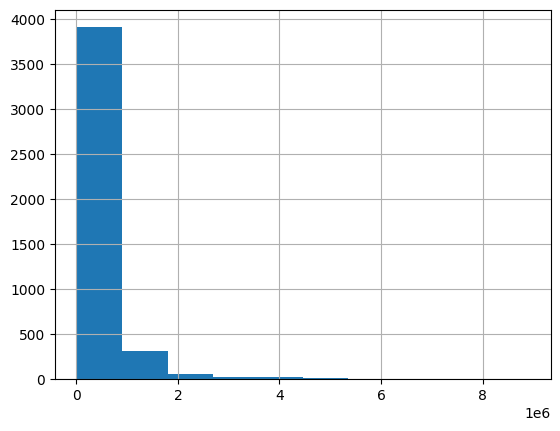

In [18]:
df['selling_price'].hist()
plt.show()

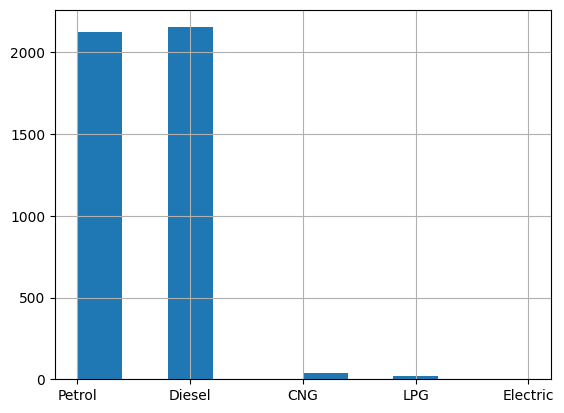

In [20]:
df['fuel'].hist()
plt.show()

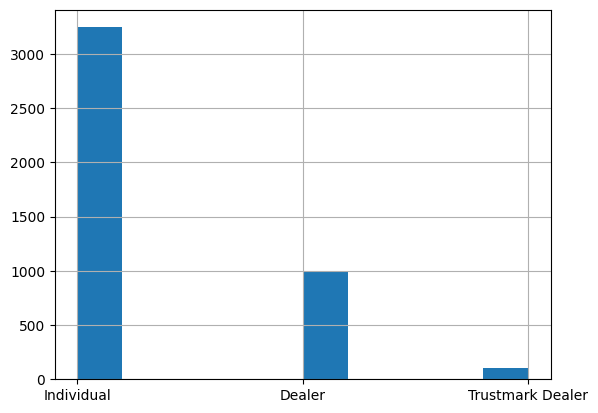

In [21]:
df['seller_type'].hist()
plt.show()

In [ ]:
#cathegorical transformation
#year from (latest year of the dataset) count how old the car is (ie. 2020)
#